# TASK-1

In [27]:
#Header files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
%config InlineBackend.figure_format='retina'

## Q1

In [ ]:

Laying_df = pd.read_csv('.\HAR\Combined\Train\LAYING\Subject_1.csv')
Sitting_df = pd.read_csv('.\HAR\Combined\Train\SITTING\Subject_1.csv')
Standing_df = pd.read_csv('.\HAR\Combined\Train\STANDING\Subject_1.csv')
Walking_df = pd.read_csv('.\HAR\Combined\Train\WALKING\Subject_1.csv')
WalkingDown_df = pd.read_csv('.\HAR\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv')
WalkingUp_df = pd.read_csv('.\HAR\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv')
# List of DataFrames
dfs = [Laying_df,Sitting_df,Standing_df,Walking_df,WalkingDown_df,WalkingUp_df]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWN','WALKING_UP']
for j, axis in enumerate(['accx', 'accy', 'accz']):
    fig, ax = plt.subplots(nrows=6, figsize=(10, 10))
    for i, df in enumerate(dfs):
        ax[i].plot(df[axis], label=f'{labels[i]}', lw=0.75,color = colors[i])
        ax[i].legend(loc='upper right',fontsize='small') 
    fig.text(0.04, 0.5, f'{axis}', va='center', ha='center', rotation='vertical', fontsize=12)
    fig.text(0.5, 0.04, 'Time (samples)', va='center', ha='center', fontsize=12)
    fig.text(0.5, 0.9, f'{axis} vs Time (WaveForm)', va='center', ha='center', fontsize=12)
    plt.show()
    

Yes, It is possible for the model to classify models based on the data.

As you can see in the above plots, each action has a different pattern in the $acc_x,acc_y,acc_z$.
Though depending on our model parameters and settings, it might be a little difficult for the model to differentiate betweens labels like laying and sitting, standing and Walking and WalkingUp. 

## Q2

In [ ]:


dfs = [np.sqrt(Laying_df['accx']**2+Laying_df['accy']**2+Laying_df['accz']**2),
       np.sqrt(Sitting_df['accx']**2+Sitting_df['accy']**2+Sitting_df['accz']**2)
       ,np.sqrt(Standing_df['accx']**2+Standing_df['accy']**2+Standing_df['accz']**2)
       ,np.sqrt(Walking_df['accx']**2+Walking_df['accy']**2+Walking_df['accz']**2)
       ,np.sqrt(WalkingDown_df['accx']**2+WalkingDown_df['accy']**2+WalkingDown_df['accz']**2)
       ,np.sqrt(WalkingUp_df['accx']**2+WalkingUp_df['accy']**2+WalkingUp_df['accz']**2)]

labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWN','WALKING_UP']

fig, ax = plt.subplots(nrows=6, figsize=(10, 15))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, df in enumerate(dfs):
    ax[i].plot(df, label=f'{labels[i]}', lw=0.75,color = colors[i])
    ax[i].legend(loc='upper right',fontsize='small') 

# Shared y-label
fig.text(0.04, 0.5, '$(acc_x^2+acc_y^2+acc_z^2)$', va='center', ha='center', rotation='vertical', fontsize=12)
# Shared x-label
fig.text(0.5, 0.04, 'Time (samples)', va='center', ha='center', fontsize=12)
plt.show()

As you can see from the above data, it is quite possible to distinguish between between static and dynamic without a ML model. As long as the you set a variable that detects the fluctuation in the linear accelaration, it will be very clear whether it is static or dynamic. But to futher detect between the subclasses of static and dynamic can only be done with the help of ML models

## Q3

#### PCA for $(total(accx^2 + accy^2 + accz^2))$

[0 1]


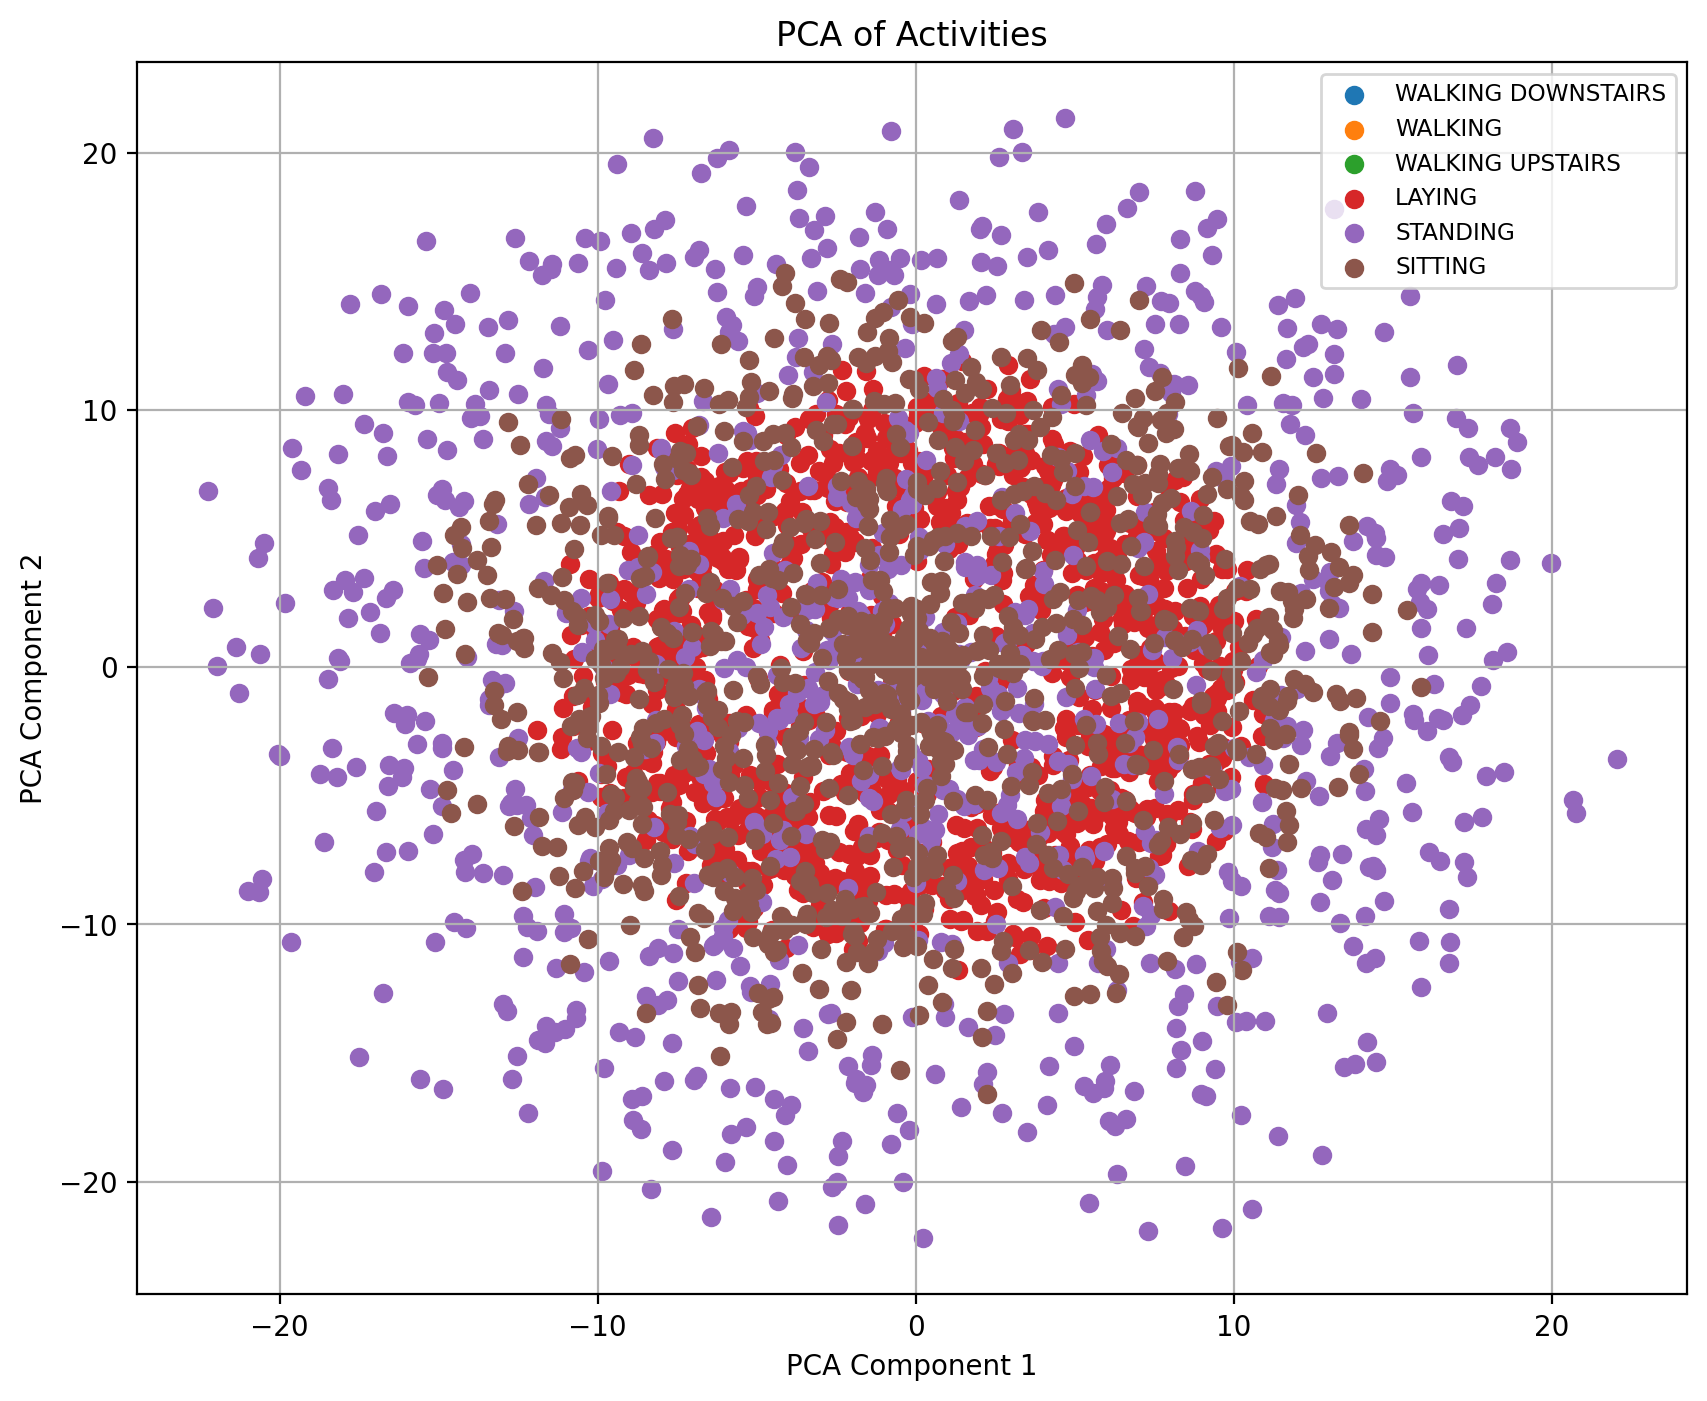

In [14]:
total_acc_x_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train/Inertial Signals", "total_acc_x_train.txt"), sep='\s+', header=None)
total_acc_y_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train/Inertial Signals", "total_acc_y_train.txt"), sep='\s+', header=None)
total_acc_z_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train/Inertial Signals", "total_acc_z_train.txt"), sep='\s+', header=None)
y_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
X_train_df = total_acc_x_df**2 +total_acc_y_df**2 +total_acc_z_df**2
# Standardize features: mean center and scale by standard deviation
X = X_train_df.values
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Apply SVD
U, S, VT = np.linalg.svd(X_standardized)

# Get the top 2 principal components
PC_indices = np.argsort(S)[-2:][::-1]
print(PC_indices)
principal_components = VT[PC_indices]
# Project data onto the first 2 principal components
X_pca = np.dot(X_standardized, principal_components.T)

# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['activity'] = y_train_df.values
# Mapping names to values (1,2,3,4,5,6) : (LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS)
activity_mapping = {
    1: 'LAYING',
    2: 'SITTING',
    3: 'STANDING',
    4: 'WALKING',
    5: 'WALKING DOWNSTAIRS',
    6: 'WALKING UPSTAIRS'
}
pca_df['activity'] = pca_df['activity'].map(activity_mapping)
# Plotting
plt.figure(figsize=(10, 8))
for activity in pca_df['activity'].unique():
    subset = pca_df[pca_df['activity'] == activity]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=activity)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Activities')
plt.legend(loc='best', fontsize='small') 
plt.grid(True)
plt.show()



#### Using TSFEL for feature extraction and followed by PCA

In [30]:
import tsfel

x_train_sig = list(np.loadtxt('./HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype='float32'))
x_test_sig = list(np.loadtxt('./HAR/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', dtype='float32'))
y_test = np.loadtxt('./HAR/UCI HAR Dataset/test/y_test.txt')
y_train = np.loadtxt('./HAR/UCI HAR Dataset/train/y_train.txt')
activity_labels = np.array(pd.read_csv('./HAR/UCI HAR Dataset/activity_labels.txt', header=None, delimiter=' '))[:,1]
# dataset sampling frequency
fs = 100
# @title Feature Extraction
cfg_file = tsfel.get_features_by_domain()  # All features
# Get features
X_train = tsfel.time_series_features_extractor(cfg_file, x_train_sig, fs=fs)
X_test = tsfel.time_series_features_extractor(cfg_file, x_test_sig, fs=fs)

X_train

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,132.990081,1.294540,1.0,104.716599,0.635042,25.0,102.0,1.017970,1.020573,0.007812,...,0.005997,0.020923,0.044347,0.075148,0.112178,0.154262,0.200325,0.249277,0.300002,0.0
1,133.027571,1.294710,2.0,104.746119,0.635061,25.0,102.0,1.017996,1.020761,0.007812,...,0.005995,0.020766,0.044246,0.075134,0.112253,0.154364,0.200319,0.249067,0.299532,0.0
2,133.153092,1.295280,2.0,104.844954,0.635453,25.0,102.0,1.017851,1.022033,0.007812,...,0.006079,0.020943,0.044242,0.074898,0.111656,0.153614,0.199711,0.248738,0.299468,0.0
3,133.263210,1.295855,2.0,104.931661,0.635038,25.0,102.0,1.018887,1.022092,0.007812,...,0.005986,0.020872,0.044412,0.075125,0.111956,0.153846,0.199776,0.248622,0.299172,0.0
4,133.238371,1.295743,2.0,104.912103,0.634856,25.0,102.0,1.018887,1.021936,0.007812,...,0.005956,0.020878,0.044416,0.075533,0.112991,0.155453,0.201727,0.250771,0.301548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,134.907126,1.260476,4.0,106.226084,0.607547,25.0,102.0,0.791259,1.196781,0.007812,...,0.022423,0.129050,0.213761,0.310323,0.451769,0.609806,0.744468,0.824602,0.847180,0.0
7348,131.893773,1.247136,4.0,103.853365,0.614021,25.0,102.0,0.779933,1.147766,0.007812,...,0.027975,0.102103,0.151870,0.225837,0.343540,0.487749,0.628688,0.734251,0.784950,0.0
7349,132.482042,1.253587,5.0,104.316568,0.623826,25.0,102.0,0.776768,1.189563,0.007812,...,0.014780,0.072685,0.132276,0.245585,0.425900,0.644799,0.854672,1.000234,1.052074,0.0
7350,133.762067,1.259575,5.0,105.324462,0.616348,25.0,102.0,0.798091,1.195809,0.007812,...,0.013587,0.065841,0.123773,0.241824,0.431761,0.661559,0.881302,1.036969,1.099334,0.0


In [31]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(X_train)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)


array([[ 0.54666399, -0.74394002,  0.02746746, ..., -0.29517872,
        -1.23797622, -0.11654823],
       [ 0.5473922 , -0.55045456,  0.02799503, ..., -0.29532926,
        -1.22404357, -0.11654823],
       [ 0.54983029, -0.55045456,  0.03935812, ..., -0.28594466,
        -1.1836604 , -0.11654823],
       ...,
       [ 0.53679593,  0.03000183, -0.29700108, ...,  0.45578679,
         0.13249869, -0.11654823],
       [ 0.56165891,  0.03000183, -0.51330001, ...,  0.37023592,
        -0.05371367, -0.11654823],
       [ 0.59142873, -0.16348363,  0.16560387, ...,  0.56562768,
        -0.18450145, -0.11654823]])

[0 1]


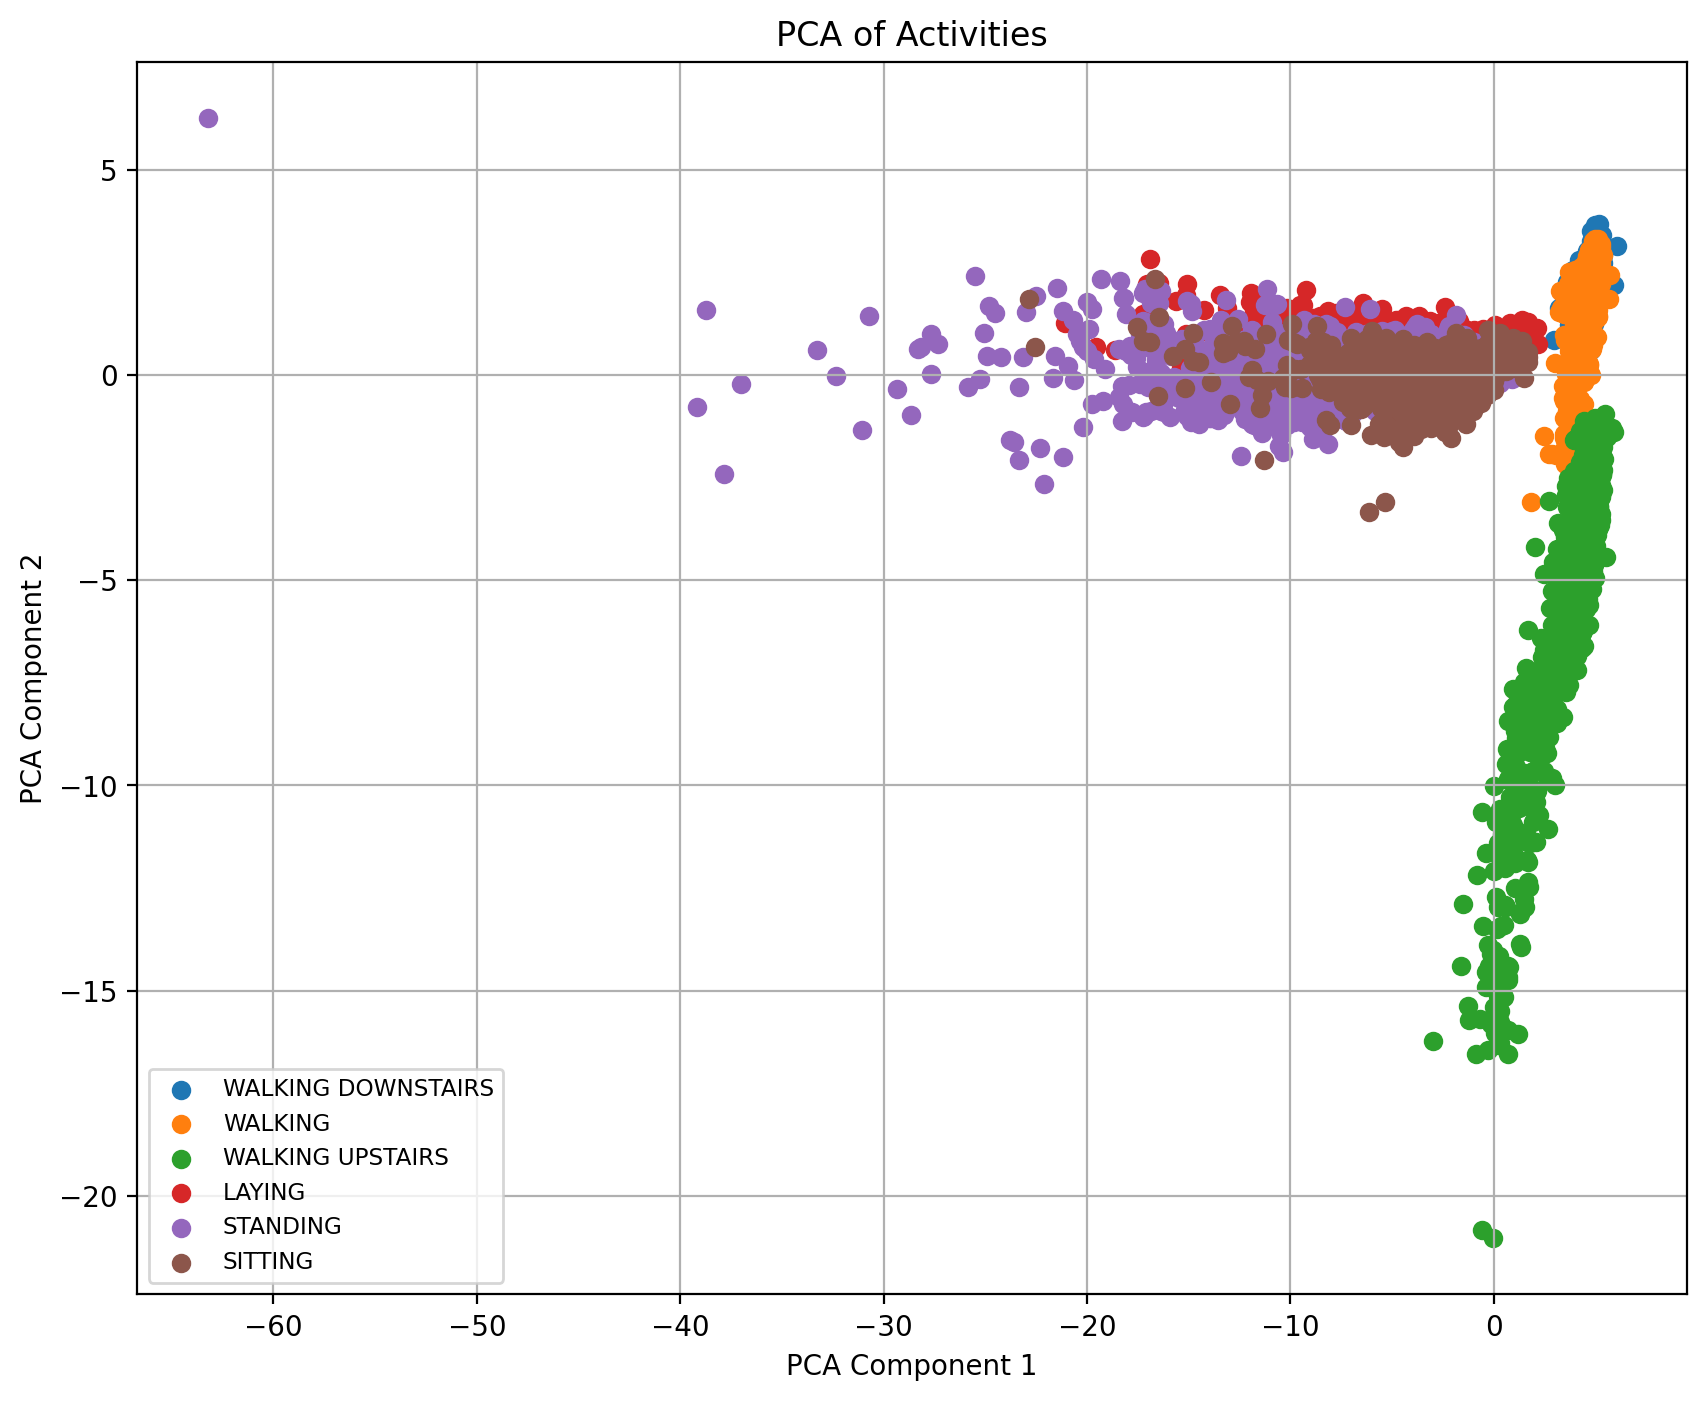

In [32]:

X = nX_train
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Apply SVD
U, S, VT = np.linalg.svd(X_standardized)

# Get the top 2 principal components
PC_indices = np.argsort(S)[-2:][::-1]
print(PC_indices)
principal_components = VT[PC_indices]
# Project data onto the first 2 principal components
X_pca = np.dot(X_standardized, principal_components.T)

# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['activity'] = y_train_df.values
# Mapping names to values (1,2,3,4,5,6) : (LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS)
activity_mapping = {
    1: 'LAYING',
    2: 'SITTING',
    3: 'STANDING',
    4: 'WALKING',
    5: 'WALKING DOWNSTAIRS',
    6: 'WALKING UPSTAIRS'
}
pca_df['activity'] = pca_df['activity'].map(activity_mapping)
# Plotting
plt.figure(figsize=(10, 8))
for activity in pca_df['activity'].unique():
    subset = pca_df[pca_df['activity'] == activity]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=activity)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Activities')
plt.legend(loc='best', fontsize='small') 
plt.grid(True)
plt.show()



#### PCA for Dataset (X_train)

[0 1]


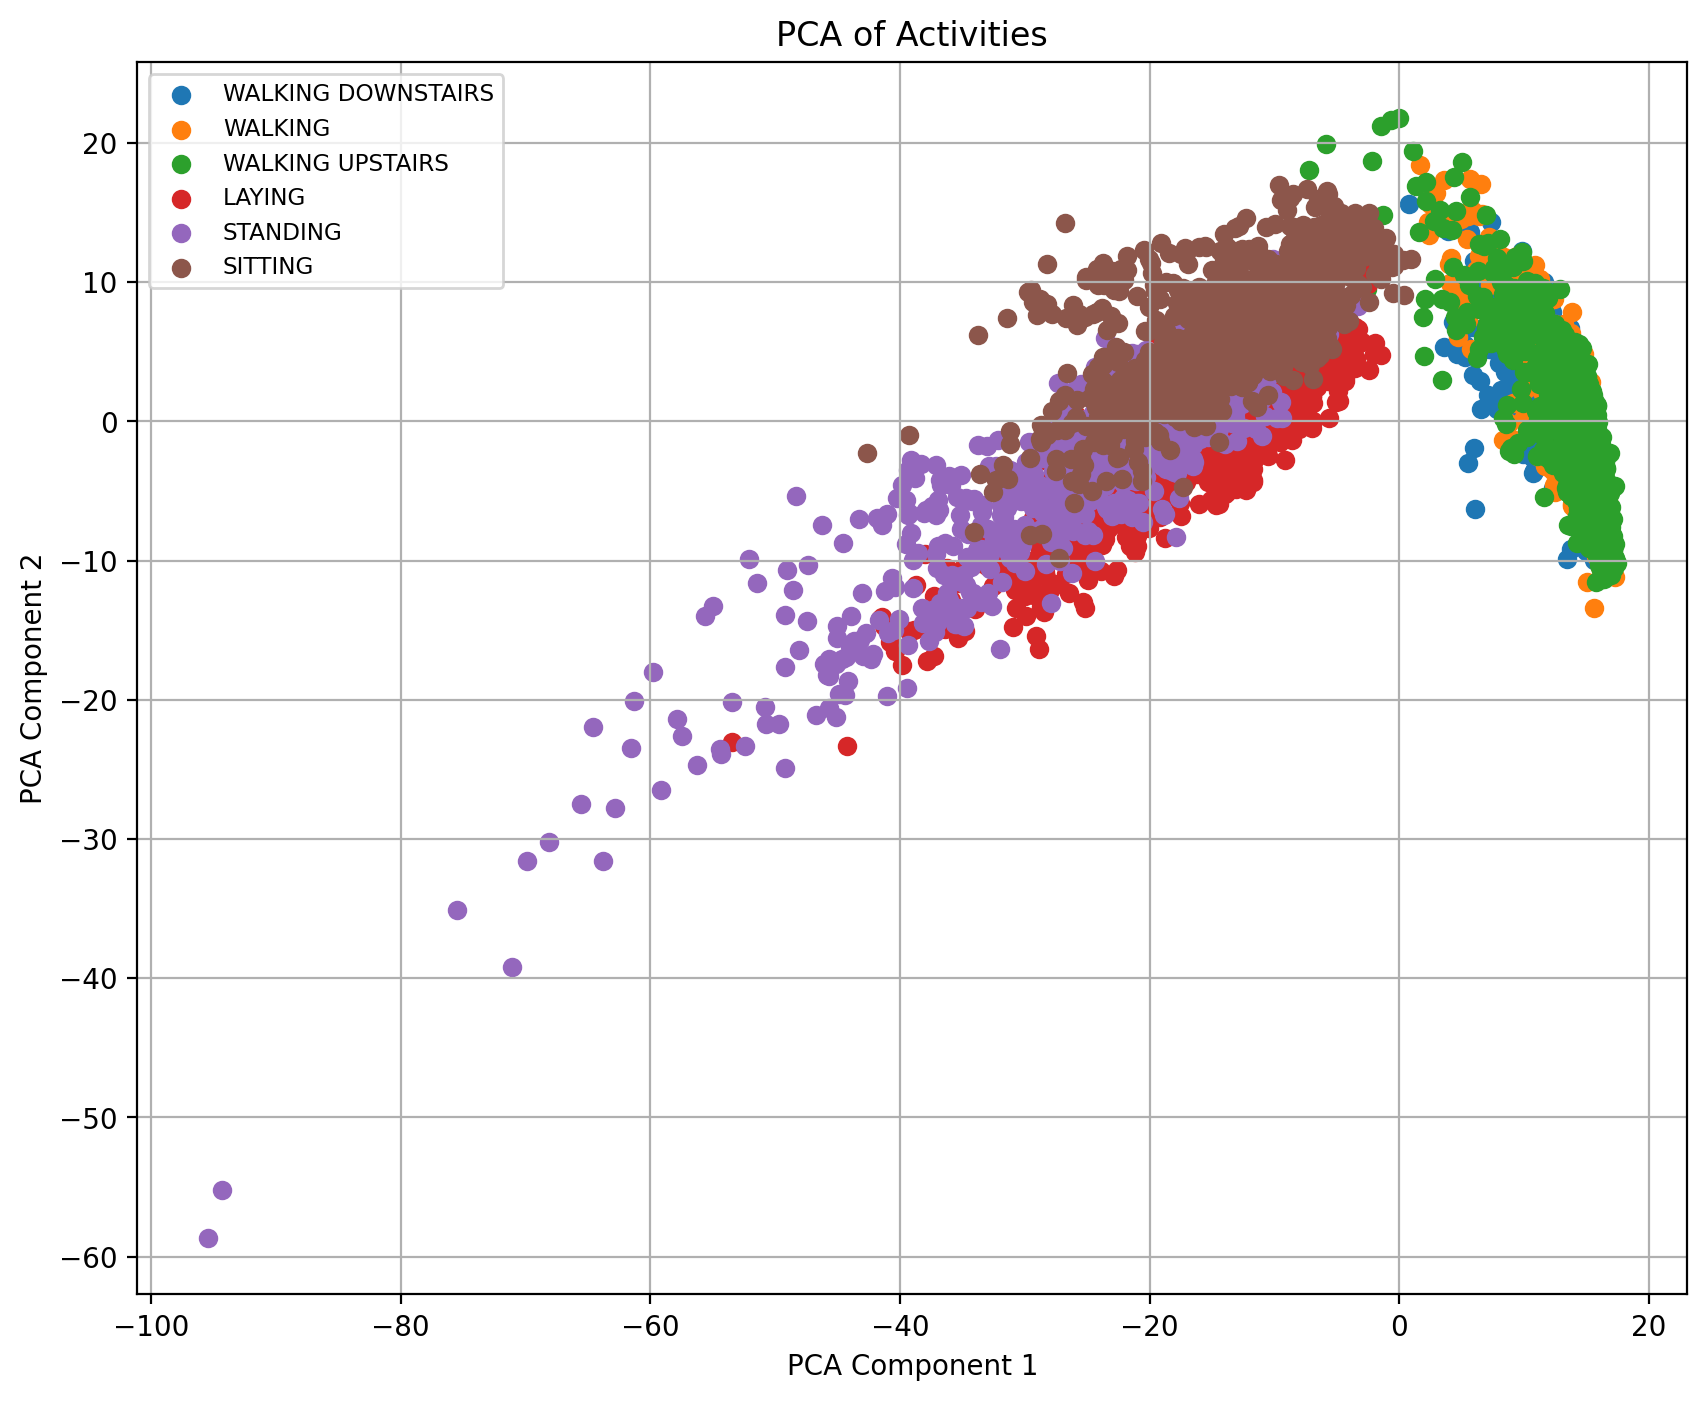

In [13]:

# Using SVD
X_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)

# Standardize features: mean center and scale by standard deviation
X = X_train_df.values
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Apply SVD
U, S, VT = np.linalg.svd(X_standardized)

# Get the top 2 principal components
PC_indices = np.argsort(S)[-2:][::-1]
print(PC_indices)
principal_components = VT[PC_indices]
# Project data onto the first 2 principal components
X_pca = np.dot(X_standardized, principal_components.T)

# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['activity'] = y_train_df.values
# Mapping names to values (1,2,3,4,5,6) : (LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS)
activity_mapping = {
    1: 'LAYING',
    2: 'SITTING',
    3: 'STANDING',
    4: 'WALKING',
    5: 'WALKING DOWNSTAIRS',
    6: 'WALKING UPSTAIRS'
}
pca_df['activity'] = pca_df['activity'].map(activity_mapping)
# Plotting
plt.figure(figsize=(10, 8))
for activity in pca_df['activity'].unique():
    subset = pca_df[pca_df['activity'] == activity]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=activity)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Activities')
plt.legend(loc='best', fontsize='small') 
plt.grid(True)
plt.show()


The results of PCA on TSFEL,features dataset are better than the Total Acceleration.
* You see the **Total Acceleration scatter plot** it is more likely spread out in the graph we can't get clusters from that plot.
* In **Features dataset scatter plot** it is able to make 2 clusters which are static and dynamic activity.
* From **TSFEL scatter plot** also we are able to get 2 clusters which are static and dynamic activity but it is able to get feature extraction also.

Both TSFEL and Features dataset plots boths methods are great for visualizing the data. But **TSFEL method** able to extract features also.